<a href="https://colab.research.google.com/github/EFalkonn/BharatInternML2024/blob/main/BharatInternIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/60
3/3 [==============================] - 2s 215ms/step - loss: 0.9756 - accuracy: 0.3854 - val_loss: 0.9008 - val_accuracy: 0.4583
Epoch 2/60
3/3 [==============================] - 0s 37ms/step - loss: 0.9594 - accuracy: 0.4271 - val_loss: 0.8845 - val_accuracy: 0.4583
Epoch 3/60
3/3 [==============================] - 0s 41ms/step - loss: 0.9442 - accuracy: 0.4896 - val_loss: 0.8689 - val_accuracy: 0.5000
Epoch 4/60
3/3 [==============================] - 0s 29ms/step - loss: 0.9292 - accuracy: 0.5208 - val_loss: 0.8537 - val_accuracy: 0.5000
Epoch 5/60
3/3 [==============================] - 0s 54ms/step - loss: 0.9151 - accuracy: 0.5417 - val_loss: 0.8388 - val_accuracy: 0.5000
Epoch 6/60
3/3 [==============================] - 0s 58ms/step - loss: 0.9013 - accuracy: 0.5729 - val_loss: 0.8246 - val_accuracy: 0.5000
Epoch 7/60
3/3 [==============================] - 0s 38ms/step - loss: 0.8879 - accuracy: 0.6250 - val_loss: 0.8110 - val_accuracy: 0.5833
Epoch 8/60
3/3 [==========

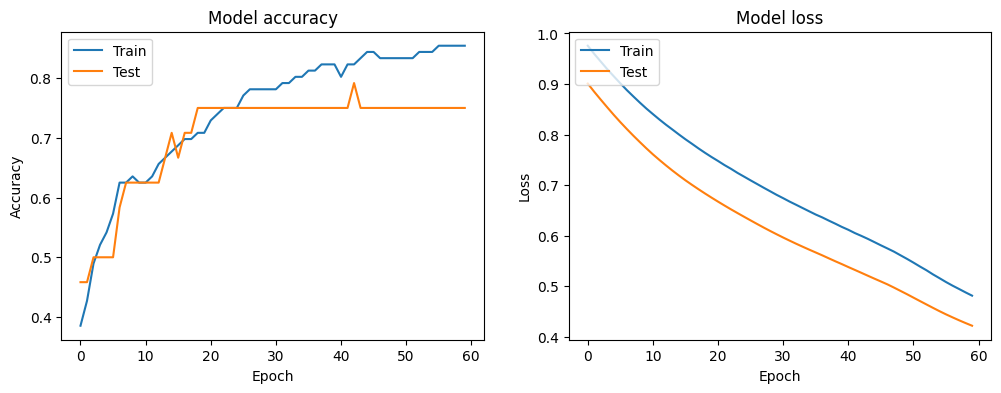

In [5]:
# 3. Iris Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=60, validation_split=0.2, verbose=1)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Display classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()